In [1]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import pyLDAvis
import string
from nltk.stem.wordnet import WordNetLemmatizer
import re
import nltk
#nltk.download('wordnet') # if Necessary
import matplotlib.pyplot as plt  # Necessary to determine appropriate value for max_iter

In [2]:
# Read data from a file
with open('The_Republic.txt', 'r', encoding='utf-8') as f:
    lines = f.readlines()

In [3]:
# Set conditions for removing specific sentences
#keywords_to_remove = ["a", "b"]  # List of keywords to be removed

In [4]:
# Remove specific sentences
#lines = [line for line in lines if all(keyword not in line for keyword in keywords_to_remove)]

In [5]:
# Perform text preprocessing
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()
def clean(doc):
    punc_free = ''.join(ch for ch in doc if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized
lines = [clean(line) for line in lines]

In [6]:
# Creating a document-word matrix
vect = CountVectorizer(max_df=1.0)#　If this value is set to 0.3, words appearing in more than 30% of all documents will be ignored.
data = vect.fit_transform(lines)

In [7]:
# LDA Application and Learning
lda = LatentDirichletAllocation(n_components=10, max_iter=30,
                                learning_method='online',
                                learning_offset=10., # default
                                random_state=0)

lda.fit(data)

LatentDirichletAllocation(learning_method='online', max_iter=30, random_state=0)

In [8]:
# Visualization using pyLDAvis
pyLDAvis.enable_notebook()

In [9]:
# Obtain necessary data
topic_term_dists = lda.components_ / lda.components_.sum(axis=1)[:, np.newaxis]  # Word distribution for each topic
doc_topic_dists = lda.transform(data)  # Topic distribution for each document
term_frequency = data.sum(axis=0).A1  # Number of occurrences of each word
vocab = vect.get_feature_names_out()  # word list
doc_lengths = data.sum(axis=1).A1  # Number of words in each document

In [10]:
# Convert data to visualization format with pyLDAvis.prepare function
panel = pyLDAvis.prepare(
    topic_term_dists=topic_term_dists,
    doc_topic_dists=doc_topic_dists,
    doc_lengths=doc_lengths,
    vocab=vocab,
    term_frequency=term_frequency,
    mds='mmds' # mds= 'pcoa',mds='tsne'
)

In [11]:
# Show Results
panel

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
8     -0.345415 -0.106706       1        1  51.739980
6     -0.352966 -0.005951       2        1  29.714050
3     -0.285454  0.170619       3        1   8.829745
9     -0.108150 -0.374793       4        1   4.887863
7      0.345750 -0.072294       5        1   1.182044
1      0.240679  0.194430       6        1   0.870292
0      0.077729  0.261783       7        1   0.811400
4      0.170009 -0.160856       8        1   0.770183
5      0.116552 -0.005084       9        1   0.647761
2      0.141266  0.098852      10        1   0.546683, topic_info=             Term          Freq         Total Category  logprob  loglift
4031           he   3081.000000   3081.000000  Default  30.0000  30.0000
443           and   9442.000000   9442.000000  Default  29.0000  29.0000
8591          the  15210.000000  15210.000000  Default  28.0000  28.0000
9605          you   1356.000000   1356.000000  Default  27.0000  27.0000
8590         that   2913.000000   2913.000000  Default  26.0000  26.0000
...           ...           ...           ...      ...      ...      ...
1474     cobbling      2.917898      3.695777  Topic10  -5.9834   4.9727
7086   reflecting      2.808745      3.586620  Topic10  -6.0215   4.9646
8122        sport      2.800209      3.577998  Topic10  -6.0245   4.9639
4312  illeducated      2.709734      3.487541  Topic10  -6.0574   4.9567
438       anarchy      2.714808      4.639100  Topic10  -6.0555   4.6733

[544 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
1         5  0.928286    100
20        8  0.776649    1e1
27        8  0.932509    1e8
32        8  0.776649    1f3
42        5  0.829622    216
...     ...       ...    ...
9614      2  0.116333  youth
9614      3  0.536921  youth
9619      2  0.134027   zeus
9619      3  0.357405   zeus
9619      7  0.491431   zeus

[744 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[9, 7, 4, 10, 8, 2, 1, 5, 6, 3])

In [12]:
# From here, the phase to find the appropriate value for learning_offset is optional.

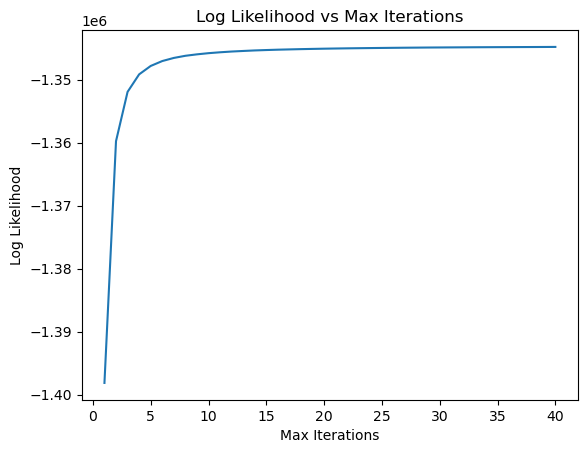

In [13]:
# Explore optimal learning_offset values from graphs
likelihoods = []
max_iters_range = range(1, 41)
for max_iter in max_iters_range:
    lda = LatentDirichletAllocation(n_components=10, max_iter=max_iter,
                                    learning_method='online',
                                    learning_offset=10,
                                    random_state=0)
    lda.fit(data)
    likelihood = lda.score(data)
    likelihoods.append(likelihood)

plt.plot(max_iters_range, likelihoods)
plt.xlabel('Max Iterations')
plt.ylabel('Log Likelihood')
plt.title('Log Likelihood vs Max Iterations')
plt.show()